<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMBD0231ENSkillsNetwork866-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


## Metrics for Classification


Estimated time needed: **30** minutes


<p style='color: red'>The purpose of this lab is to show you how to evaluate a classification model using various metrics.</p>


## __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li><a href="#Datasets">Datasets</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
        </ol>
    </li>
    <li>
        <a href="#Examples">Examples</a>
        <ol>
            <li><a href="#Task-1---Load-the-data-in-a-csv-file-into-a-dataframe">Task 1 - Load the data in a csv file into a dataframe</a></li>
    <li><a href="#Task-2---Identify-the-target-column-and-the-data-columns">Task 2 - Identify the target column and the data columns</a></li>
    <li><a href="#Task-3---Split-the-data-set">Task 3 - Split the data set</a></li>
    <li><a href="#Task-4---Build-and-train-a-classifier">Task 4 - Build and train a classifier</a></li>
    <li><a href="#Task-5---Evaluate-the-model">Task 5 - Evaluate the model</a></li>        </ol>
    </li>

<li><a href="#Exercises">Exercises</a></li>
<ol>
    <li><a href="#Exercise-1---Load-a-dataset">Exercise 1 - Load a dataset</a></li>
    <li><a href="#Exercise-2---Identify-the-target-column-and-the-data-columns">Exercise 2 - Identify the target column and the data columns</a></li>
    <li><a href="#Exercise-3---Split-the-data">Exercise 3 - Split the data</a></li>
    <li><a href="#Exercise-4---Build-and-Train-a-new-classifier">Exercise 4 - Build and Train a new classifier</a></li>
    <li><a href="#Exercise-5---Evaluate-the-model">Exercise 5 - Evaluate the model</a></li>
    </ol>
</ol>




## Objectives

After completing this lab you will be able to:

 - Use Pandas to load data sets.
 - Identify the target and features.
 - Use Logistic Regression to build a classifier.
 - Use metrics to evaluate the model.
 - Make predictions using a trained model.


## Datasets

In this lab you will be using dataset(s):

 - Pima Indians Diabetes Database. Available at https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database


## Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.


### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `!pip` in the code cell below.


The following required libraries are __not__ pre-installed in the Skills Network Labs environment. __You will need to run the following cell__ to install them:


In [ ]:
#None

### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

## Task 1 - Load the data in a csv file into a dataframe


In [2]:
# the data set is available at the url below.
# using the read_csv function in the pandas library, we load the data into a dataframe.
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/diabetes.csv")
df.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

Let's look at some sample rows from the dataset we loaded:


In [3]:
# show 5 random rows from the dataset
df.sample(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
571            2      130             96              0        0  22.6   
728            2      175             88              0        0  22.9   
691           13      158            114              0        0  42.3   
520            2       68             70             32       66  25.0   
3              1       89             66             23       94  28.1   

     DiabetesPedigreeFunction  Age  Outcome  
571                     0.268   21        0  
728                     0.326   22        0  
691                     0.257   44        1  
520                     0.187   25        0  
3                       0.167   21        0

Let's find out the number of rows and columns in the dataset:


In [4]:
df.shape

(768, 9)

Let's plot the types and count of Outcome


In [6]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:>

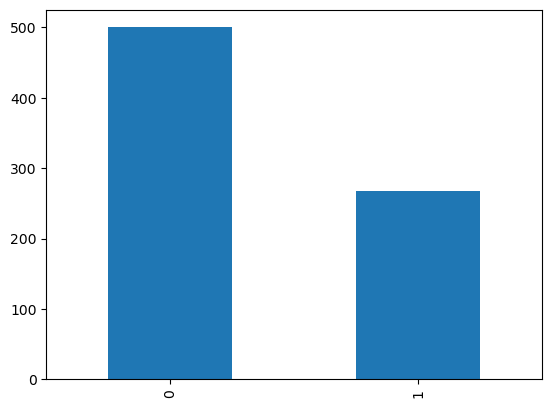

In [7]:
df.Outcome.value_counts().plot.bar()

There are 500 people without diabetes and 268 people with diabetes in this dataset.


## Task 2 - Identify the target column and the data columns


First we identify the target. Target is the value that our machine learning model needs to classify


In [8]:
y = df["Outcome"]

In [9]:
X = df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]

We identify the features next. Features are the input values our machine learning model learns from


## Task 3 - Split the data set


We split the data set in the ratio of 70:30. 70% training data, 30% testing data.


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=40)

## Task 4 - Build and train a classifier


Create a Logistic Regression model


In [11]:
classifier = LogisticRegression()

Train/Fit the model on training data


In [12]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Task 5 - Evaluate the model


Your model is now trained. Time to evaluate the model.


In [14]:
classifier.score(X_test, y_test) #Higher the score, better the model

0.7402597402597403

To compute the detailed metrics we need two values, the original mileage and the predicted mileage.


In [15]:
original_values = y_test
predicted_values = classifier.predict(X_test)

##### Precision


In [17]:
precision_score(original_values, predicted_values) # Higher the value the better the model

0.7543859649122807

##### Recall


In [19]:
recall_score(original_values, predicted_values) # Higher the value the better the model

0.48314606741573035

##### F1 Score


In [21]:
f1_score(original_values, predicted_values) # Higher the value the better the model

0.589041095890411

##### Confusion Matrix


In [22]:
confusion_matrix(original_values, predicted_values) # can be used to manually calculate various met

array([[128,  14],
       [ 46,  43]])

# Exercises


### Exercise 1 - Load a dataset


Load the cancer dataset available at URL2


In [23]:
df2 = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/diabetes.csv")
df2.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [24]:
df2.shape

(768, 9)

### Exercise 2 - Identify the target column and the data columns


 - use the Outcome column as target
 - use columns 'Pregnancies', 'Glucose', 'Insulin', 'DiabetesPedigreeFunction', 'Age' as features


In [25]:
y = df2["Outcome"]
X = df2[["Pregnancies", "Glucose", "Insulin", "DiabetesPedigreeFunction", "Age"]]

### Exercise 3 - Split the data


Split the dataset into training and testing sets. Make 33% of the data as testing set. Use 40 as random state


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=40)

### Exercise 4 - Build and Train a new classifier


Create a new Classifier and train using the training data


In [30]:
classifier2 = LogisticRegression()
classifier2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Exercise 5 - Evaluate the model


In [32]:
original_values = y_test
predicted_values = classifier2.predict(X_test)

Print the metrics :
- Precision Score
- Recall Score
- F1 Score 						


In [36]:
precision_score(original_values, predicted_values) # Higher the score, better the model

0.7678571428571429

In [37]:
recall_score(original_values, predicted_values) # Higher the value the better the model

0.43434343434343436

In [38]:
f1_score(original_values, predicted_values) # Higher the value the better the model

0.5548387096774193

Congratulations you have completed this lab.<br>


## Authors


[Ramesh Sannareddy](https://www.linkedin.com/in/rsannareddy/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMBD0231ENSkillsNetwork866-2023-01-01)


### Other Contributors


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-04-15|0.1|Ramesh Sannareddy|Initial Version Created|


Copyright © 2023 IBM Corporation. All rights reserved.
